## Question


Link to the dataset: [Diabetes dataset on Kaggle](https://www.kaggle.com/datasets/mathchi/diabetes-data-set)

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


2. Load the dataset into a pandas DataFrame for analysis.

In [86]:
#load the diabetes.csv
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


3. Perform an initial exploration of the dataset to understand its structure (the number of features, observations, and variable types). Write at least three findings from the exploratory data analysis.

In [87]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [88]:
df.shape

(768, 9)

All diagnostic measures are numerical. The dataset contains 768 observations and 9 features. The target variable is integer in the data read in, but it should be categorical. Let's convert it to categorical. 

\color{red} 



In [89]:
df['Outcome'] = pd.Categorical(df['Outcome'])

4. Generate summary statistics for the dataset, including descriptive statistics for categorical variables if there is any. Provide at least two statements based on the results. Don't include the response variable in this summary statistics.


In [90]:
# describe after dropping Outcome
df.drop('Outcome', axis=1).describe()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


The maximum number of pregnancies is 17, and the minimum is 0. The average age of the patients is 33.24 years. Minimum value of zero in glucose, blood pressure, insulin, and BMI is not possible.

\color{red}



5. Visualize the distribution of the diabetes outcome variable. Provide at least one statement based on the plot.

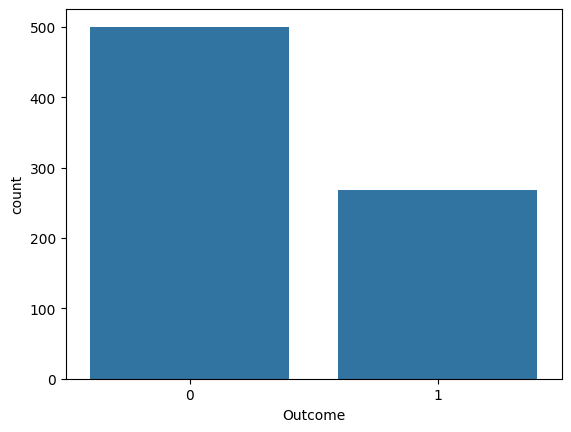

In [91]:
# bar plot for Outcome
sns.countplot(x='Outcome', data=df)
plt.show()

There is a class imbalance in the dataset, with more patients not having diabetes than having diabetes.

6. Check for missing values in the dataset. If any are found, report the number of observations with missing values. Do not remove them from the analysis, as the reason for their absence or irrelevant values is unknown.

\color{blue}

Hint: glucose, blood pressure, insulin, and BMI should not be zero.

\color{black}

In [92]:
#at least one of the four variables 
# (Glucose, BloodPressure, Insulin, or BMI) is 0
zero_values = df[(df['Glucose'] == 0) | 
                 (df['BloodPressure'] == 0) | 
                 (df['Insulin'] == 0) | 
                 (df['BMI'] == 0)]

len(zero_values)

376

If we consider zeros in glucose, blood pressure, insulin, and BMI as missing values, there are 376 observations with missing values. However, we don't remove them from the analysis, but this can impact the logistic regression model's performance. 

7. Skip the outlier analysis. Standardize the numerical predictor variables to ensure they are on the same scale. 

\color{blue}

Hint:

a. Identify the numerical columns in the dataset.

b. Scale the selected columns in (a) and update the DataFrame with the transformed values.


\color{black}

In [93]:
scalar = StandardScaler()
num_var = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[num_var] = scalar.fit_transform(df[num_var])
print(df.head(5))

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age Outcome  
0                  0.468492  1.425995       1  
1                 -0.365061 -0.190672       0  
2                  0.604397 -0.105584       1  
3                 -0.920763 -1.041549       0  
4                  5.484909 -0.020496       1  


8. Split the dataset into a training set(75\%) and a testing set (25\%).

\color{blue}
Hint: 

a. Store only the predictor variables in a DataFrame X before splitting.

b. Store the response variable in y before splitting.

c. Use stratified random sampling to maintain the class distribution.

\color{black}

In [94]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1
    )

9. Create an instance of the logistic regression using `scikit-learn`. Change the maximum number of iterations taken for the solvers to converge to 120.

In [95]:
m_log  = LogisticRegression(max_iter=120)


10. Train the model on the training set and generate probability predictions for the test set. 
    - Identify the order of categories in the target variable within the predicted probability array.

In [96]:
y_train.value_counts()

Outcome
0    377
1    199
Name: count, dtype: int64

In [97]:
m_log.fit(X_train, y_train)
pred_prob = m_log.predict_proba(X_test)
print(pred_prob[0:5])

[[0.5699922  0.4300078 ]
 [0.68360865 0.31639135]
 [0.85035044 0.14964956]
 [0.94958694 0.05041306]
 [0.78817025 0.21182975]]


The first column is the probability of not having diabetes, and the second column is the probability of having diabetes.

11. Calculate the test accuracy of the model using a probability cutoff of 0.5 to classify individuals as at risk for diabetes. Discuss the model's performance, such as comparing it to random guessing (e.g., flipping a coin).

In [98]:
pred_df = pd.DataFrame(
    data = {'prob_d': pred_prob[:,1], 'y_test': y_test}
    )

pred_df['y_test_pred'] = pred_df.prob_d.map(lambda x: 1 if x>0.5 else 0)
pred_df.head(5)

,prob_d,y_test,y_test_pred
285,0.430008,0,0
101,0.316391,0,0
581,0.149650,0,0
352,0.050413,0,0
726,0.211830,0,0


In [99]:
(pred_df.y_test==pred_df.y_test_pred).mean()

np.float64(0.7760416666666666)

 The logsitic regression model has an accuracy of 0.75, which is better than random guessing.

12. Evaluate the sensitivity and specificity of the model on the test set using a probability cutoff of 0.5 for diabetes classification. 


In [100]:
cm = confusion_matrix(pred_df.y_test, pred_df.y_test_pred)
print('Confusion Matrix : \n', cm)

total = sum(sum(cm))

accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

specificity  = cm[0,0]/(cm[0,0]+cm[0,1])
print('specificity : ', specificity )

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('sensitivity : ', sensitivity)

Confusion Matrix : 
 [[109  14]
 [ 29  40]]
Accuracy :  0.7760416666666666
specificity :  0.8861788617886179
sensitivity :  0.5797101449275363


13. Discuss potential improvements for diabetes prediction based on the test set results, including accuracy and the confusion matrix. Provide at least one statement based on your analysis.

With the probability of diabetes cutoff of 0.5, the model has a sensitivity of 0.58 and a specificity of 0.89. The model can be improved by adjusting the probability cutoff to increase sensitivity.

14. Perform ROC analysis on the test set and plot the ROC curve.    
    - Additionally, calculate the area under the ROC curve (AUC).
    - Determine the optimal probability cutoff point for diabetes classification. 
    - Discuss how changing the cutoff affects sensitivity, specificity, and overall classification performance (at least two statements).

In [101]:
fpr, tpr, thresholds = roc_curve(pred_df.y_test, pred_df.prob_d)

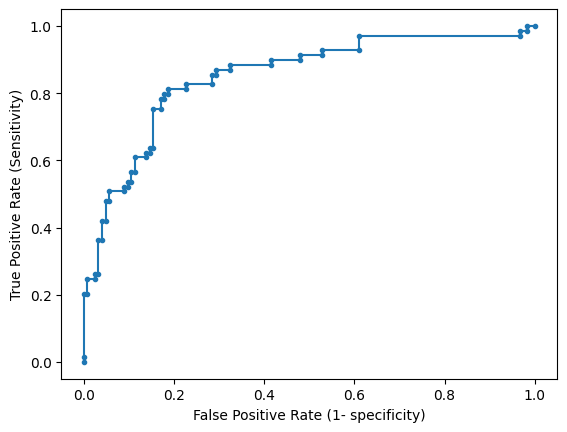

In [102]:
# plot the roc curve 
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate (1- specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [103]:
# AUC
roc_auc_score(pred_df.y_test, pred_df.prob_d)

np.float64(0.8502415458937198)

In [104]:
# compute the optimal threshold using J statistic
j_statistic = tpr - fpr
optimal_index = np.argmax(j_statistic)
optimal_threshold = thresholds[optimal_index]
optimal_threshold

np.float64(0.33313300094218273)

In [105]:
# let's find the predicted label with 0.33 threshold
pred_df['y_test_pred_033'] = pred_df.prob_d.map(lambda x: 1 if x>0.33 else 0)
cm2 = confusion_matrix(pred_df.y_test, pred_df.y_test_pred_033)
total2 = sum(sum(cm2))

accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print ('Accuracy : ', accuracy2)

specificity2  = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('specificity : ', specificity2 )

sensitivity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('sensitivity : ', sensitivity2)

Accuracy :  0.8125
specificity :  0.8130081300813008
sensitivity :  0.8115942028985508


Although specificity is reduced by 0.07, sensitivity and accuaracy laregely increased when the probability cutoff is changed from 0.5 to 0.3. The AUC is 0.85, indicating the model's good performance.

15. The remaining questions will use the selected predictor variables: 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', and 'DiabetesPedigreeFunction'.
    - Identify which predictor variable is missing from the model.
    - Fit a logistic regression model using the selected predictor variables (use the maximum number of iterations taken for the solvers to converge to 120).

In [106]:
# what variables missing from 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', and 'DiabetesPedigreeFunction'
missing_var = set(df.columns) - set(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'])
missing_var

{'Age', 'Outcome'}

Age predictor is missing from the selected variables.

In [107]:
X_train2 = X_train.drop('Age', axis=1)
X_test2 = X_test.drop('Age', axis=1)

m_log2 = LogisticRegression(max_iter=120)
m_log2.fit(X_train2, y_train)


LogisticRegression(max_iter=120)

16. Based on the model in (15), what can you conclude about the missing predictor variable in predicting the risk of diabetes ('Outcome')?

\color{blue}
Hint: 

a. Calculate the test accuracy of the model without the missing predictor (use the optimal probability cutoff found in (14) for diabetes classification).

b. Compare the test accuracy found in (14) with the model with all predictors to assess the impact of the missing variable.

\color{black}


In [108]:
pred_prob2 = m_log2.predict_proba(X_test2)
pred_df2 = pd.DataFrame(
    data = {'prob_d': pred_prob2[:,1], 'y_test': y_test}
    )
pred_df2['y_test_pred'] = pred_df2.prob_d.map(lambda x: 1 if x>0.33 else 0)

# test accuracy with cutoff .33
(pred_df2.y_test==pred_df2.y_test_pred).mean()

np.float64(0.8020833333333334)

The test accuracy without Age is only slightly lower than the model with all predictors, indicating that Age is not a significant predictor of diabetes in this dataset. However, this results might be affected by recording missing values of BMI, glucose, blood pressure, and insulin as zero or we may need a different optimal cutoff for the model without Age.

\newpage

## References

